## Assignment 3: Use Logistic Regression to predict postive and negative film reviews
Our second assignment will have us write code to tokenize movie reviews and predict positive or negative labels.

In this assignment, you will
1. Import reviews into a dataframe, along with labels
2. Split your data in to testing and training sets
3. Transform the raw data into matrices with TF-IDF values
4. Train a logistic regression model
5. Compute precision, recall, and F1 scores
6. Plot precision-recall curve
7. Plot ROC curve
8. Summarize your work, results, and conclusions.

Feel free to start simple and try to improve your model results with more sophisticated preparation of the data, but you must use logistic regression.

Due Date: 2020-10-09 5 pm ET

Please submit your completed assignment through GradeScope. You should submit a PDF of your notebook with all output.

### Preliminaries:
import standard libraries

In [1]:
%load_ext lab_black
# you may want to import standard libraries here
import numpy as np
import pandas as pd

**Read in the reviews**

In [2]:
import glob
import nltk

# read in reviews from the NLTK corpora directory
datadir = "/Users/Jennie/nltk_data/corpora/movie_reviews"
neg = datadir + "/neg/"
pos = datadir + "/pos/"

posarr = []
negarr = []

pfiles = [f for f in glob.glob(pos + "*.txt", recursive=False)]
nfiles = [f for f in glob.glob(neg + "*.txt", recursive=False)]
for f in pfiles:
    with open(f) as my_file:
        posarr.append(my_file.read().replace("\n", ""))
for f in nfiles:
    with open(f) as my_file:
        negarr.append(my_file.read().replace("\n", ""))

### 1. Create a dataframe with labels for positive and negative
Your dataframe should have 2 columns:
* **doc** contains the raw text from the review
* **label** contains 0 (negative) or 1(positive)

In [3]:
data = {"doc": posarr + negarr, "label": [1 for i in posarr] + [0 for i in negarr]}
df = pd.DataFrame.from_dict(data)

In [4]:
df

,doc,label
0,assume nothing . the phrase is perhaps one of ...,1
1,plot : derek zoolander is a male model . he is...,1
2,i actually am a fan of the original 1961 or so...,1
3,a movie that's been as highly built up as the ...,1
4,""" good will hunting "" is two movies in one : ...",1
...,...,...
1995,synopsis : when a meteorite crashlands in the ...,0
1996,it's now the anniversary of the slayings of ju...,0
1997,coinciding with the emerging popularity of mov...,0
1998,and now the high-flying hong kong style of fil...,0


### 2. Split data into training and test sets
Use `sklearn.model_selection.train_test_split`. Make sure your result is repeatable. You should also create 2 new arrays (**`y_test`** and **`y_train`**) that contain the true labels for the samples

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.8, random_state=44)
y_train = train["label"]
y_test = test["label"]

### 3. Use TfidfVectorizer to tranform into tf-idf features
Use `sklearn.feature_extraction.text.TfidfVectorizer` to extract features and apply TF-IDF transformation. You will be creating 2 new matrices (**`x_train`** and **`x_test`** that contain the tf-idf values. Be sure you get the dimensions right.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# extract features
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df["doc"])
x_train, x_test = train_test_split(tfidf, train_size=0.8, random_state=44)

In [7]:
print(x_train.shape, x_test.shape)

(1600, 39659) (400, 39659)


### 4. Use `sklearn.linear_model.LogisticRegression` to fit a model to predict probability of positive or negative sentiment. Use those probability to create a vector `y_score` that contains your prediction. Feel free to tweak regression parameters to get your best result

In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=5, random_state=0, n_jobs=-1, verbose=5, max_iter=200)

logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
y_scores = logreg.decision_function(x_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.2s finished


### 5. Compute **precision score**, **recall score**, **f1 score**, and **average precision score**.

Please print out each value, one per line, at 2 decimal precision.

In [9]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    average_precision_score,
)

# precision, recall, f1, and average precision below
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_scores)

print("Precision Score: {:.2f}".format(precision))
print("Recall Score: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Average Precision Score: {:.2f}".format(avg_precision))

Precision Score: 0.84
Recall Score: 0.88
F1 Score: 0.86
Average Precision Score: 0.93


### 6. Plot a precision-recall curve, with recall on the x-axis, and precision on the y-axis.

Hint: use `precision_recall_curve` and `plot_precision_recall_curve` from `sklearn.metrics`

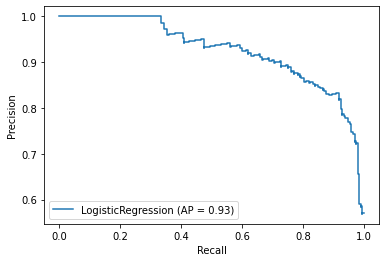

In [10]:
# plot precision-recall curve
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
plot_precision_recall_curve(logreg, x_test, y_test)

### 7. Plot ROC curve, with false-positive rate on the x-axis, and true-positive rate on the y-axis.

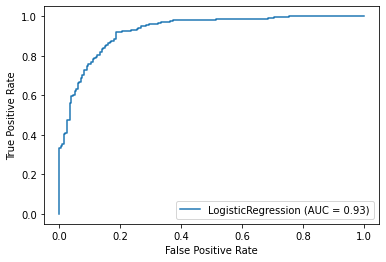

In [11]:
# Plot ROC curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(logreg, x_test, y_test)

### 8. Commentary
Please summarize your results, including precision and recall, and describe what modifications you made to improve your results.

Without tuning any parameters, fitting a Logistic Regression gives a precision score of 0.83, recall score of 0.83, F1 score of 0.83, and an average precision score of 0.91. After specifying certain parameters (C=5, random_state=0, n_jobs=-1, verbose=5, max_iter=200), the precision score increases to 0.84, recall score increases to 0.88, F1 score increases to 0.86, and average precision score increases to 0.93. This means that of all movies in the test set, the model has a 84% positive predictive rate.